# EDA Dataset Spaceship Titanic

## Descripción del Dataset

PassengerId is a unique identifier for each passenger. Each identifier has the form gggg_pp, where gggg indicates the group with which the passenger is traveling, and pp is their number in the group. People in a group are often family members, but not always.

HomePlanet - the planet from which the passenger departed, usually the planet of his permanent residence.

CryoSleep - indicates whether the passenger has decided to go into suspended animation for the duration of the flight. Passengers in cryosleep are locked in their cabins.

Cabin - the number of the cabin in which the passenger is located. Takes the form deck/num/side, where side can be either P for port or S for starboard.

Destination - the planet on which the passenger will disembark.

Age - the age of the passenger.

VIP - whether the passenger has paid for a special VIP service during the flight.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Room service, Food court, shopping center, Spa, VRDeck - the amount that a passenger paid for each of the many luxurious amenities of the Titanic spacecraft.

Name - the passenger's first and last name.

Transported - whether the passenger was transported to another dimension. This is the goal, the column that you are trying to predict.


In [1]:
# importación de librarías

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import catboost
from catboost import CatBoostClassifier
from catboost import Pool
#ayuda a determinar las características que más influyen en la variable de salida
from sklearn.feature_selection import mutual_info_classif




In [2]:
# Parámetros gráficos

params = {'figure.figsize' : (12,6),
         'font.size' : 12,
         'axes.titlesize' : 20,
         'axes.linewidth' : 2}


bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1,
        'alpha' : 1}

plt.style.use('fivethirtyeight')
color = ['#E36149', '#49AF72']
matplotlib.rcParams.update(params)

In [3]:
# Сountplot based on a one column

def countplot_one_column(name_column, title):
    c = sns.countplot(data = df_test,
                  x = name_column,
                  edgecolor = 'black',
                  linewidth = 1.5)
    plt.bar_label(c.containers[0], bbox = bbox)

    plt.title(title, fontweight = 'bold')
    plt.show()

In [4]:
# Сountplot based on multiple column

def countplot_hue_column(name_column, hue_column, title):
    c = sns.countplot(data = df_test,
                  x = name_column,
                  hue = hue_column,
                  linewidth = 1,
                  edgecolor = 'black',
                  palette = color)
    plt.bar_label(c.containers[0], bbox = bbox)
    plt.bar_label(c.containers[1], bbox = bbox)
    
    plt.title(title, fontweight = 'bold')
    plt.show()


In [5]:
# Conectando las bases de datos

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# Verificar líneas x Columnas
df.shape

(8693, 14)

In [8]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Mutual Information

In [9]:
X = df.copy()
y = X.pop("Transported")

#transformacion temporal de las variables tipo object
for col_name in X.select_dtypes(["object"]):
    X[col_name],_ = X[col_name].factorize()

#rellena temporalmente el valor de las columnas vacias con el valor promedio de las demas 
X = X.apply(lambda x: x.fillna(x.mean())).astype(int)
features = X.dtypes == int

def MakeMiScore(X,y,disc_features):
    mi_scores = mutual_info_classif(X,y, discrete_features=disc_features)
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores

print(MakeMiScore(X,y,features))

PassengerId     0.693121
Name            0.675740
Cabin           0.542349
FoodCourt       0.156348
Spa             0.145030
RoomService     0.143630
VRDeck          0.134813
ShoppingMall    0.129106
CryoSleep       0.113554
HomePlanet      0.018931
Age             0.015482
Destination     0.006161
VIP             0.000702
Name: MI Scores, dtype: float64


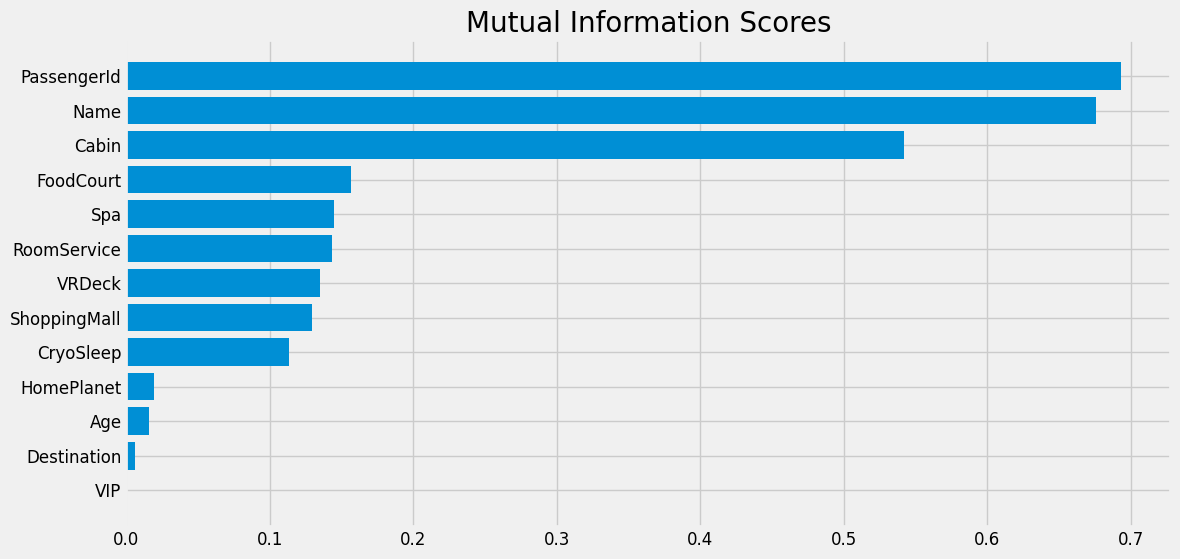

In [10]:
def PlotScores(scores):
    scores = scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

PlotScores(MakeMiScore(X,y,features))

## Limpieza de los datos

In [11]:
# Eliminación de la columna Name
df.drop("Name", axis=1, inplace=True)

## Transformación de los datos

### Separación del PassagerId en Group y CountGroup

In [12]:
# preparando dos nuevas columnas a partir de PassegerId
Group = df['PassengerId'].str.split('_', expand=True)[0] 
NumberInGroup = df['PassengerId'].str.split('_', expand=True)[1]

# Renomeando PassagerId como Group
df['PassengerId'] = Group
df = df.rename(columns = {'PassengerId' : 'Group'})
# removing the extra 0
df['Group'] = df['Group'].astype('int')

# add NumberInGroup
insert_position = 1
df.insert(insert_position, 'NumberInGroup', NumberInGroup)
# removing the extra 1
df['NumberInGroup'] = df['NumberInGroup'].astype('int')



In [13]:
# crea nuevo dataset llamado count_group
count_group = df.groupby('Group').agg({'Group' : 'count'})
count_group.index.name = 'Group'
count_group = count_group.rename(columns = {'Group' : 'CountGroup'})

count_group.head(10)


,CountGroup
Group,
1,1
2,1
3,2
4,1
5,1
6,2
7,1
8,3
9,1


In [14]:
# Creating CountGroup - number of people in the group
df.insert(2, 'CountGroup', np.nan)

for index in count_group.index:
    df.loc[df['Group'] == index, 'CountGroup'] = \
    df.loc[df['Group'] == index, 'CountGroup'].fillna(count_group.loc[index][0])

df['CountGroup'] = df['CountGroup'].astype('int')

### Separación de Cabin en CabinType, NumCabins y Side

In [15]:
# Separar los elementos de Cabin
deck = df['Cabin'].str.split('/', expand = True)[0]
num = df['Cabin'].str.split('/', expand = True)[1]
side = df['Cabin'].str.split('/', expand = True)[2]

df['Cabin'] = deck
df = df.rename(columns = {'Cabin' : 'CabinType'})
df.insert(6, 'NumCabins', num)
df.insert(7, 'Side', side)


### Rellenar los nulos

In [16]:
# Age
df['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [17]:
# Inserir la edad median a los registros vacíos
median = df['Age'].median()
df.loc[df['Age'].isna(),'Age'] = df.loc[df['Age'].isna(),'Age'].fillna(median)

In [18]:
median = df['RoomService'].median()
df.loc[df['RoomService'].isna(), 'RoomService'] = df.loc[df['RoomService'].isna(), 'RoomService'].fillna(median)
df.loc[df['FoodCourt'].isna(), 'FoodCourt'] = df.loc[df['FoodCourt'].isna(), 'FoodCourt'].fillna(median)
df.loc[df['ShoppingMall'].isna(), 'ShoppingMall'] = df.loc[df['ShoppingMall'].isna(), 'ShoppingMall'].fillna(median)
df.loc[df['Spa'].isna(), 'Spa'] = df.loc[df['Spa'].isna(), 'Spa'].fillna(median)
df.loc[df['VRDeck'].isna(), 'VRDeck'] = df.loc[df['VRDeck'].isna(), 'VRDeck'].fillna(median)

In [19]:
# function for replacing extreme values

def replacement(column):
    
    p75 = np.percentile(df[column], 75)
    p85 = np.percentile(df[column], 85)
    p95 = np.percentile(df[column], 95)
    
    df.loc[(df[column] > p75) & (df[column] < p85), column] = \
    df.loc[(df[column] > p75) & (df[column] < p85), column].mean()
    
    df.loc[(df[column] > p85) & (df[column] < p95), column] = \
    df.loc[(df[column] > p85) & (df[column] < p95), column].mean()
    
    df.loc[(df[column] > p95), column] = \
    df.loc[(df[column] > p95), column].mean()
    
    df[column] = df[column].round(2)

In [20]:
columns = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in columns:
    replacement(column)

In [21]:
df.loc[df['VIP'].isna(), 'VIP'] = df.loc[df['VIP'].isna(), 'VIP'].fillna(False)

def fillna_column(columns_nan, column_fill, value, fill):
    df.loc[(df[columns_nan].isna()) & (df[column_fill] == value), columns_nan] = \
    df.loc[(df[columns_nan].isna()) & (df[column_fill] == value), columns_nan].fillna(fill)

fillna_column('Destination', 'HomePlanet', 'Earth','TRAPPIST-1e')
fillna_column('Destination', 'HomePlanet', 'Europa', '55 Cancri e')




In [22]:
fillna_column('Destination', 'Transported', False,'TRAPPIST-1e')
fillna_column('Destination', 'Transported', True, '55 Cancri e')


In [23]:
fillna_column('Side', 'Transported', False, 'P')
fillna_column('Side', 'Transported', True, 'S')

In [24]:
df.loc[df['CabinType'].isna(), 'CabinType'] = df.loc[df['CabinType'].isna(), 'CabinType'].fillna("G")

In [25]:
# Obtén todos los tipos de cabinas únicos en tus datos
tipos_de_cabinas = df['CabinType'].unique()

# Imprime los tipos de cabinas únicos
print("Tipos de Cabinas existentes:")
for tipo in tipos_de_cabinas:
    print(tipo)
    

Tipos de Cabinas existentes:
B
F
A
G
E
D
C
T


In [26]:
fillna_column('HomePlanet', 'CabinType', 'B', 'Europa')
fillna_column('HomePlanet', 'CabinType', 'F', 'Earth')
fillna_column('HomePlanet', 'CabinType', 'A', 'Europa')
fillna_column('HomePlanet', 'CabinType', 'G', 'Earth')
fillna_column('HomePlanet', 'CabinType', 'E', 'Earth')
fillna_column('HomePlanet', 'CabinType', 'D', 'Mars')
fillna_column('HomePlanet', 'CabinType', 'C', 'Europa')
fillna_column('HomePlanet', 'CabinType', 'T', 'Europa')

In [27]:
fillna_column('CryoSleep', 'Transported', False, False)
fillna_column('CryoSleep', 'Transported', True, True)


In [28]:
df = df.drop('NumCabins' , axis = 1)

In [29]:
df.isna().sum()

Group            0
NumberInGroup    0
CountGroup       0
HomePlanet       0
CryoSleep        0
CabinType        0
Side             0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
dtype: int64

In [30]:
#Transforma la variable booleana en numèrica ( 0 o 1)
label_encoder = LabelEncoder()

df['Transported'] = label_encoder.fit_transform(df['Transported'])
df['CryoSleep'] = label_encoder.fit_transform(df['CryoSleep'])
df['VIP'] = label_encoder.fit_transform(df['VIP'])



In [31]:
print(df.CabinType.value_counts(normalize = True))


CabinType
F    0.321408
G    0.317267
E    0.100771
B    0.089612
C    0.085931
D    0.054987
A    0.029449
T    0.000575
Name: proportion, dtype: float64


In [32]:
print(df.Side.value_counts(normalize = True))


Side
S    0.504774
P    0.495226
Name: proportion, dtype: float64


In [33]:
print(df.Group.value_counts(normalize = True))


Group
4498    0.000920
8168    0.000920
8728    0.000920
8796    0.000920
8956    0.000920
          ...   
3483    0.000115
3480    0.000115
3478    0.000115
3473    0.000115
4620    0.000115
Name: proportion, Length: 6217, dtype: float64


In [34]:
print(df.CountGroup.value_counts(normalize = True))


CountGroup
1    0.552744
2    0.193489
3    0.117336
4    0.047394
5    0.030484
7    0.026573
6    0.020016
8    0.011964
Name: proportion, dtype: float64


In [35]:
df.head()

,Group,NumberInGroup,CountGroup,HomePlanet,CryoSleep,CabinType,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,1,1,Europa,0,B,P,TRAPPIST-1e,39.0,0,0.0,0.00,0.00,0.00,0.00,0
1,2,1,1,Earth,0,F,S,TRAPPIST-1e,24.0,0,109.0,9.00,109.03,803.23,168.31,1
2,3,1,2,Europa,0,A,S,TRAPPIST-1e,58.0,1,43.0,5981.94,0.00,4078.93,168.31,0
3,3,2,2,Europa,0,A,S,TRAPPIST-1e,33.0,0,0.0,1205.63,593.51,4078.93,168.31,0
4,4,1,1,Earth,0,F,S,TRAPPIST-1e,16.0,0,303.0,270.46,109.03,803.23,2.00,1


### Transformaciones- Numéricas: MinMaxScaler / Categóricas: OneHotEncoding

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

numeric = ['Group', 'NumberInGroup', 'CountGroup', 'Age', 'RoomService', 
        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

cat = ['HomePlanet', 'CabinType', 'Side', 'Destination']

others_col = ['CryoSleep', 'VIP', 'Transported']

trans_cat = ('CatTrans', OneHotEncoder(), cat)
trans_num = ('NumTrans', MinMaxScaler(), numeric)

transformer = ColumnTransformer([trans_cat, trans_num], remainder='passthrough')

transformed_data = transformer.fit_transform(df)

# Obtiene los nombres de las columnas categóricas codificadas
cat_encoder = transformer.named_transformers_['CatTrans']
cat_encoded_names = cat_encoder.get_feature_names_out(cat)

# Combina los nombres de las columnas categóricas codificadas con las columnas numéricas y restantes
column_names = list(cat_encoded_names) + numeric + others_col

df_transformed = pd.DataFrame(transformed_data, columns=column_names)

df_transformed.shape


(8693, 28)

In [37]:
df_transformed.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinType_A,CabinType_B,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,...,CountGroup,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,Transported
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.493671,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.303797,0.007608,0.001505,0.05524,0.196922,0.041567,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.734177,0.003001,1.000000,0.00000,1.000000,0.041567,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.417722,0.000000,0.201545,0.30070,1.000000,0.041567,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.202532,0.021149,0.045213,0.05524,0.196922,0.000494,0.0,0.0,1.0


### Pool [CatBoost]


In [38]:
X_train = df_transformed.drop(['Transported'], axis = 1)
y_train = df_transformed.Transported

In [39]:
X_train

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinType_A,CabinType_B,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,...,NumberInGroup,CountGroup,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.493671,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.303797,0.007608,0.001505,0.05524,0.196922,0.041567,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.142857,0.734177,0.003001,1.000000,0.00000,1.000000,0.041567,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.142857,0.417722,0.000000,0.201545,0.30070,1.000000,0.041567,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.202532,0.021149,0.045213,0.05524,0.196922,0.000494,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.518987,0.000000,1.000000,0.00000,1.000000,0.041567,0.0,1.0
8689,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.227848,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0
8690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.329114,0.000000,0.000000,1.00000,0.000245,0.000000,0.0,0.0
8691,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.142857,0.405063,0.000000,0.201545,0.00000,0.045335,1.000000,0.0,0.0


In [40]:
X_train, X_val, y_train, y_val = train_test_split(df_transformed.drop(['Transported'], axis=1), df_transformed['Transported'], train_size=0.9)


In [41]:
train_pool = Pool(data = X_train, label= y_train)
val_pool = Pool(data = X_val, label= y_val)

In [42]:
print('Train Pool')
print(train_pool.get_feature_names())
print(train_pool.shape)
print('\Validation Pool')
print(val_pool.get_feature_names()) 
print(val_pool.shape)

Train Pool
['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CabinType_A', 'CabinType_B', 'CabinType_C', 'CabinType_D', 'CabinType_E', 'CabinType_F', 'CabinType_G', 'CabinType_T', 'Side_P', 'Side_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Group', 'NumberInGroup', 'CountGroup', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']
(7823, 27)
\Validation Pool
['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CabinType_A', 'CabinType_B', 'CabinType_C', 'CabinType_D', 'CabinType_E', 'CabinType_F', 'CabinType_G', 'CabinType_T', 'Side_P', 'Side_S', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Group', 'NumberInGroup', 'CountGroup', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CryoSleep', 'VIP']
(870, 27)


### Ecoding of variables

### RandomForesterClassifier

In [43]:
X_train, X_val, y_train, y_val = train_test_split(df_transformed.drop(['Transported'], axis=1), df_transformed['Transported'], train_size=0.9)

In [44]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

accuracy = cross_val_score(rfc, X_train, y_train, cv = 3, scoring = 'accuracy')

In [45]:
print(accuracy)
print(f'\nmean = {accuracy.mean()}, \nstd = {accuracy.std()}')

[0.79371166 0.79102761 0.7920982 ]

mean = 0.7922791536550564, 
std = 0.0011032040624339781


In [46]:
y_pred = rfc.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
accuracy

0.8114942528735632

### Tuning

In [47]:
rfc = RandomForestClassifier(n_estimators = 1800,
                             max_depth = 10)

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1800)

In [48]:
y_pred = rfc.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print(accuracy)

0.8103448275862069


### LogReg


In [49]:
lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_val) 

accuracy = accuracy_score(y_val, y_pred)
accuracy

0.7988505747126436

### CatBoost

In [50]:
model = CatBoostClassifier(eval_metric = 'Accuracy',
                           one_hot_max_size = 8)

model.fit(train_pool,
          eval_set = val_pool,
          verbose = 100,
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.052671
0:	learn: 0.7448549	test: 0.7218391	best: 0.7218391 (0)	total: 159ms	remaining: 2m 38s
100:	learn: 0.8146491	test: 0.8091954	best: 0.8091954 (98)	total: 626ms	remaining: 5.57s
200:	learn: 0.8349738	test: 0.8149425	best: 0.8195402 (162)	total: 1.13s	remaining: 4.48s
300:	learn: 0.8550428	test: 0.8149425	best: 0.8195402 (162)	total: 1.58s	remaining: 3.67s
400:	learn: 0.8701265	test: 0.8160920	best: 0.8195402 (162)	total: 2.06s	remaining: 3.08s
500:	learn: 0.8846990	test: 0.8172414	best: 0.8206897 (445)	total: 2.53s	remaining: 2.52s
600:	learn: 0.8942861	test: 0.8126437	best: 0.8206897 (445)	total: 3.02s	remaining: 2s
700:	learn: 0.9046402	test: 0.8022989	best: 0.8206897 (445)	total: 3.51s	remaining: 1.5s
800:	learn: 0.9111594	test: 0.8011494	best: 0.8206897 (445)	total: 4s	remaining: 993ms
900:	learn: 0.9194682	test: 0.8022989	best: 0.8206897 (445)	total: 4.47s	remaining: 491ms
999:	learn: 0.9281606	test: 0.8034483	best: 0.8206897 (445)	total: 4.95s	remainin

## Tabla de test

### Preparación de la tabla de test

In [51]:
PassengerId = df_test['PassengerId']

In [52]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [53]:
# Eliminación de la columna Name
df_test.drop("Name", axis=1, inplace=True)

### Preparacion de los datos

In [54]:
# preparando dos nuevas columnas a partir de PassegerId
Group = df_test['PassengerId'].str.split('_', expand=True)[0] 
NumberInGroup = df_test['PassengerId'].str.split('_', expand=True)[1]

# Renomeando PassagerId como Group
df_test['PassengerId'] = Group
df_test = df_test.rename(columns = {'PassengerId' : 'Group'})
# removing the extra 0
df_test['Group'] = df_test['Group'].astype('int')

# add NumberInGroup
insert_position = 1
df_test.insert(insert_position, 'NumberInGroup', NumberInGroup)
# removing the extra 1
df_test['NumberInGroup'] = df_test['NumberInGroup'].astype('int')



In [55]:
# crea nuevo dataset llamado count_group
count_group = df_test.groupby('Group').agg({'Group' : 'count'})
count_group.index.name = 'Group'
count_group = count_group.rename(columns = {'Group' : 'CountGroup'})

count_group.head()


,CountGroup
Group,
13,1
18,1
19,1
21,1
23,1


In [56]:
# Creating CountGroup - number of people in the group
df_test.insert(2, 'CountGroup', np.nan)

for index in count_group.index:
    df_test.loc[df_test['Group'] == index, 'CountGroup'] = \
    df_test.loc[df_test['Group'] == index, 'CountGroup'].fillna(count_group.loc[index][0])

df_test['CountGroup'] = df_test['CountGroup'].astype('int')

In [57]:
# Separar los elementos de Cabin
deck = df_test['Cabin'].str.split('/', expand = True)[0]
num = df_test['Cabin'].str.split('/', expand = True)[1]
side = df_test['Cabin'].str.split('/', expand = True)[2]

df_test['Cabin'] = deck
df_test = df_test.rename(columns = {'Cabin' : 'CabinType'})
df_test.insert(6, 'NumCabins', num)
df_test.insert(7, 'Side', side)


In [58]:
# Age
df_test['Age'].describe()

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

In [59]:
# Inserir la edad median a los registros vacíos
median = df_test['Age'].median()
df_test.loc[df_test['Age'].isna(),'Age'] = df_test.loc[df_test['Age'].isna(),'Age'].fillna(median)

In [60]:
median = df_test['RoomService'].median()
df_test.loc[df_test['RoomService'].isna(), 'RoomService'] = df_test.loc[df_test['RoomService'].isna(), 'RoomService'].fillna(median)
df_test.loc[df_test['FoodCourt'].isna(), 'FoodCourt'] = df_test.loc[df_test['FoodCourt'].isna(), 'FoodCourt'].fillna(median)
df_test.loc[df_test['ShoppingMall'].isna(), 'ShoppingMall'] = df_test.loc[df_test['ShoppingMall'].isna(), 'ShoppingMall'].fillna(median)
df_test.loc[df_test['Spa'].isna(), 'Spa'] = df_test.loc[df_test['Spa'].isna(), 'Spa'].fillna(median)
df_test.loc[df_test['VRDeck'].isna(), 'VRDeck'] = df_test.loc[df_test['VRDeck'].isna(), 'VRDeck'].fillna(median)

In [61]:
# function for replacing extreme values

def replacement_test(column):
    
    p75 = np.percentile(df_test[column], 75)
    p85 = np.percentile(df_test[column], 85)
    p95 = np.percentile(df_test[column], 95)
    
    df_test.loc[(df_test[column] > p75) & (df_test[column] < p85), column] = \
    df_test.loc[(df[column] > p75) & (df_test[column] < p85), column].mean()
    
    df_test.loc[(df[column] > p85) & (df_test[column] < p95), column] = \
    df_test.loc[(df[column] > p85) & (df_test[column] < p95), column].mean()
    
    df_test.loc[(df_test[column] > p95), column] = \
    df_test.loc[(df_test[column] > p95), column].mean()
    
    df_test[column] = df_test[column].round(2)

In [62]:
columns = ['FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for column in columns:
    replacement_test(column)

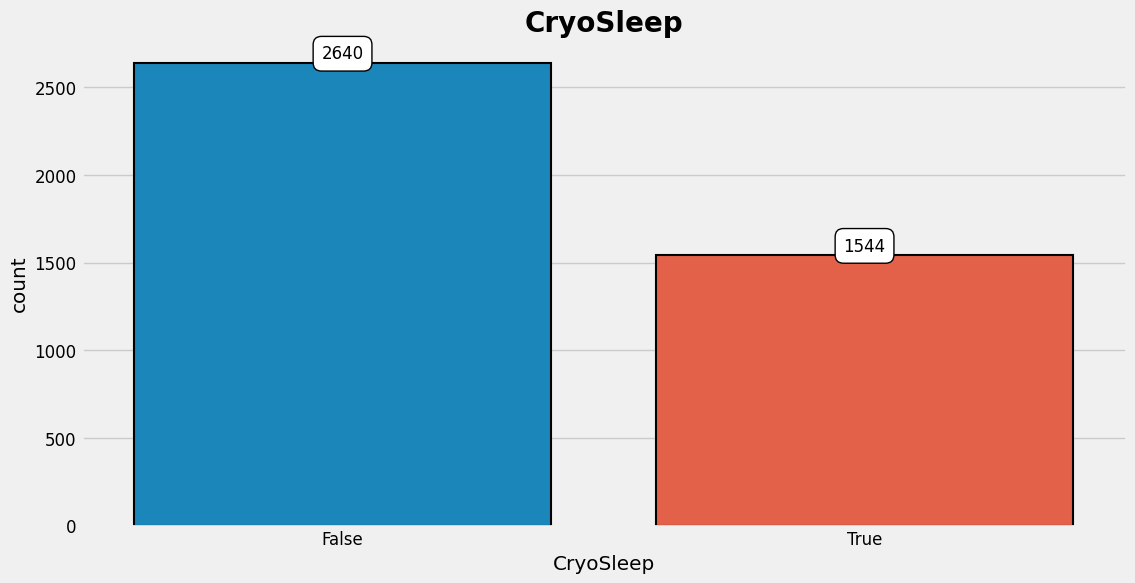

In [63]:
countplot_one_column('CryoSleep', 'CryoSleep')


In [64]:
df_test.loc[df_test['CryoSleep'].isna(), 'CryoSleep'] = df_test.loc[df_test['CryoSleep'].isna(), 'CryoSleep'].fillna(False)


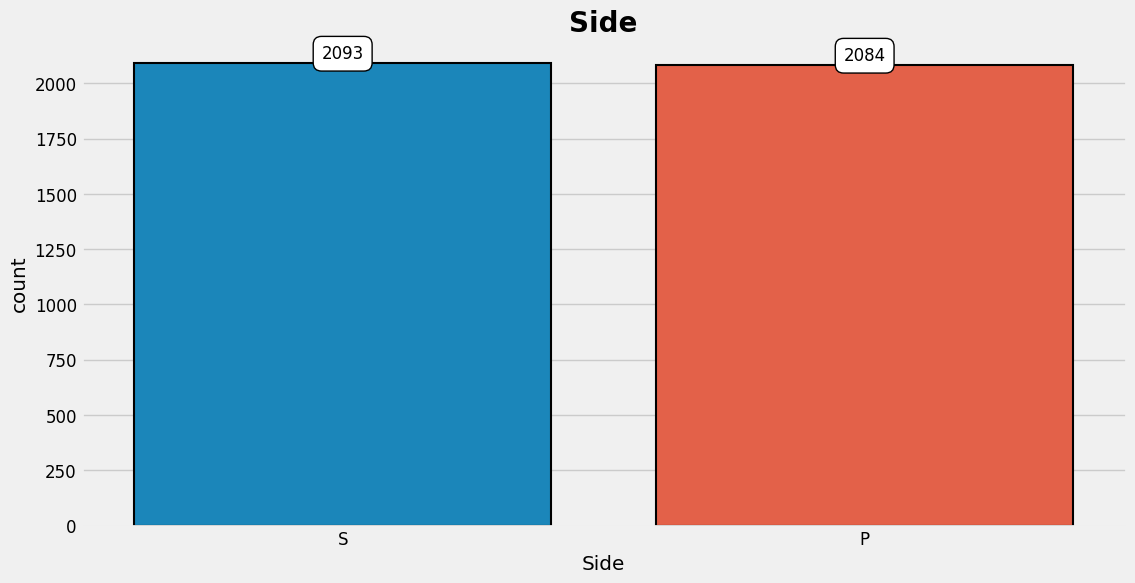

In [65]:
countplot_one_column('Side','Side')


In [66]:
# Calcula las proporciones de pasajeros con "S" y "P"
total_passengers = len(df_test)
count_S = df_test['Side'].value_counts()['S']
count_P = df_test['Side'].value_counts()['P']

proportion_S = count_S / total_passengers
proportion_P = count_P / total_passengers

# Calcula cuántos registros llenar con "S" y cuántos con "P"
num_fill_S = int(proportion_S * 100)  # 100 es el total de registros NaN
num_fill_P = int(proportion_P * 100)

# Llena los valores faltantes con "S" y "P" en función de las cantidades calculadas
df_test.loc[df_test['Side'].isnull()].sample(n=num_fill_S, random_state=42, axis=0)['Side'] = 'S'
df_test.loc[df_test['Side'].isnull(), 'Side'] = 'P'


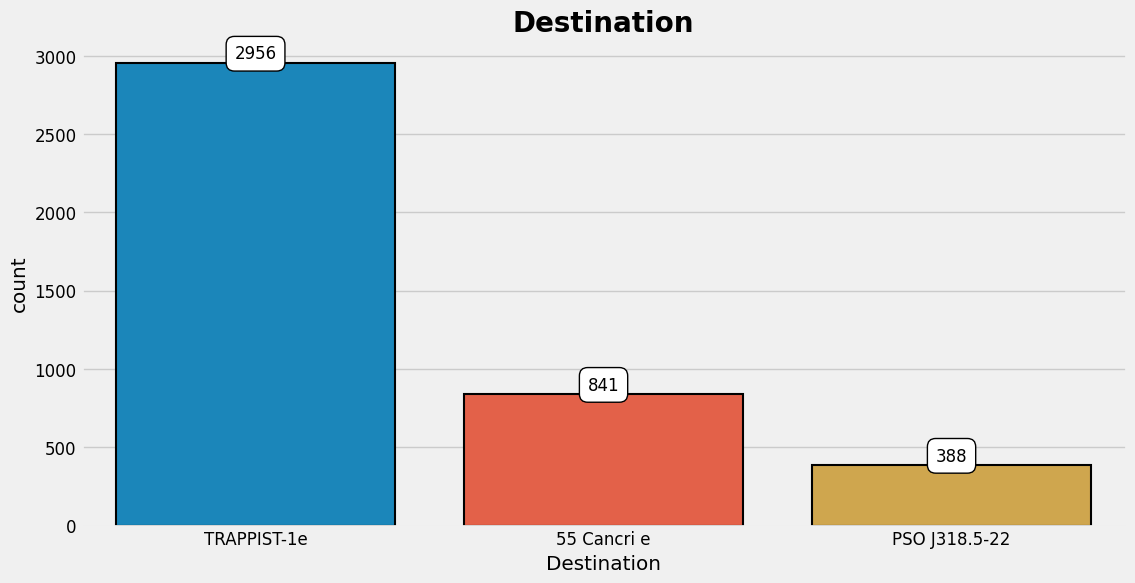

In [67]:
countplot_one_column('Destination', 'Destination')


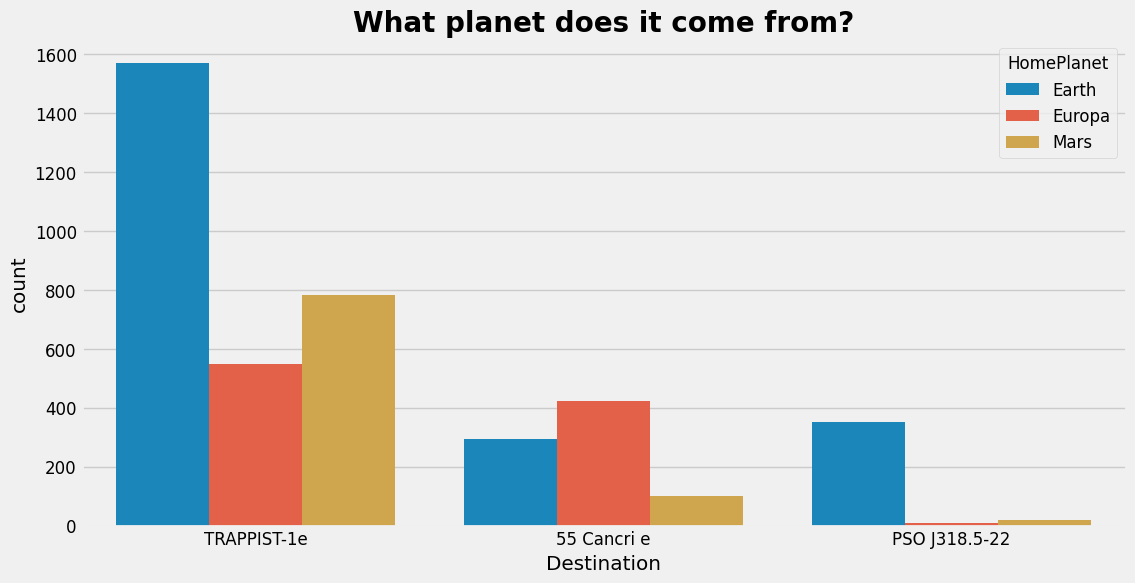

In [68]:
sns.countplot(data = df_test,
              x = 'Destination',
              hue = 'HomePlanet')
plt.title('What planet does it come from?', fontweight = 'bold')
plt.show()

In [69]:
# Calcula las proporciones de DESTINACION de los pasajeros
total_passengers = len(df_test)
count_Trappist = df_test['Destination'].value_counts()['TRAPPIST-1e']
count_Cancri  = df_test['Destination'].value_counts()['55 Cancri e']
count_PSO  = df_test['Destination'].value_counts()['PSO J318.5-22']

proportion_Trappist = count_Trappist / total_passengers
proportion_Cancri = count_Cancri / total_passengers
proportion_PSO = count_PSO / total_passengers

# Calcula cuántos registros llenar con "S" y cuántos con "P"
num_fill_Trappist = int(proportion_Trappist * 100)  # 100 es el total de registros NaN
num_fill_Cancri = int(proportion_Cancri * 100)
num_fill_PSO = int(proportion_PSO * 100)


# Llena los valores faltantes con "S" y "P" en función de las cantidades calculadas
df_test.loc[df_test['Destination'].isnull()].sample(n=num_fill_Trappist, random_state=42, axis=0)['Destination'] = 'TRAPPIST-1e'
df_test.loc[df_test['Destination'].isnull()].sample(n=num_fill_Cancri, random_state=42, axis=0)['Destination'] = '55 Cancri e'
df_test.loc[df_test['Destination'].isnull(), 'Destination'] = 'PSO J318.5-22'


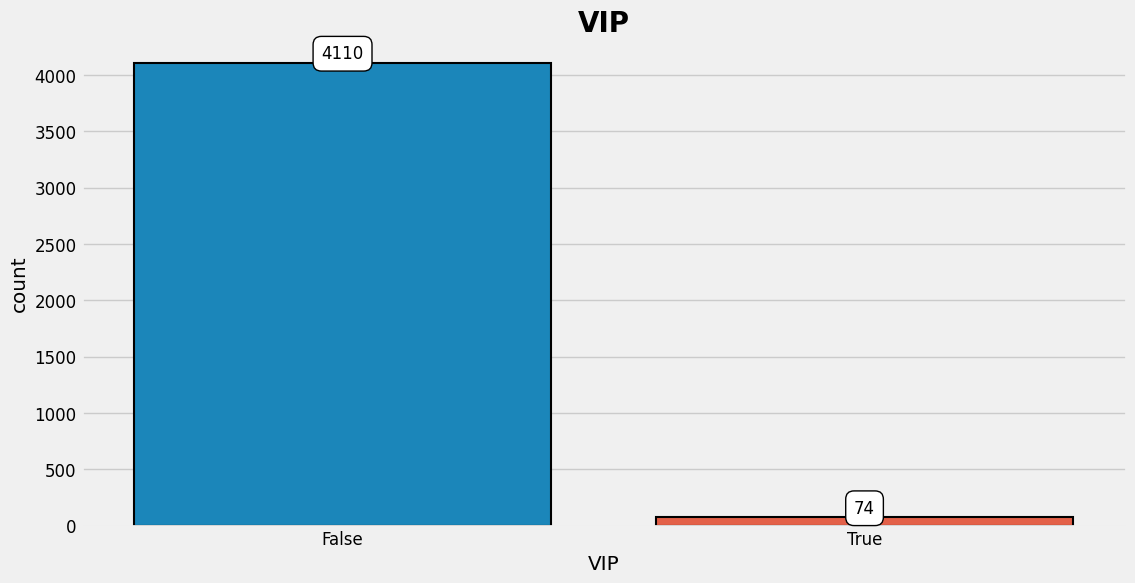

In [70]:
countplot_one_column('VIP', 'VIP')


In [71]:
df_test.loc[df_test['VIP'].isna(), 'VIP'] = df_test.loc[df_test['VIP'].isna(), 'VIP'].fillna(False)


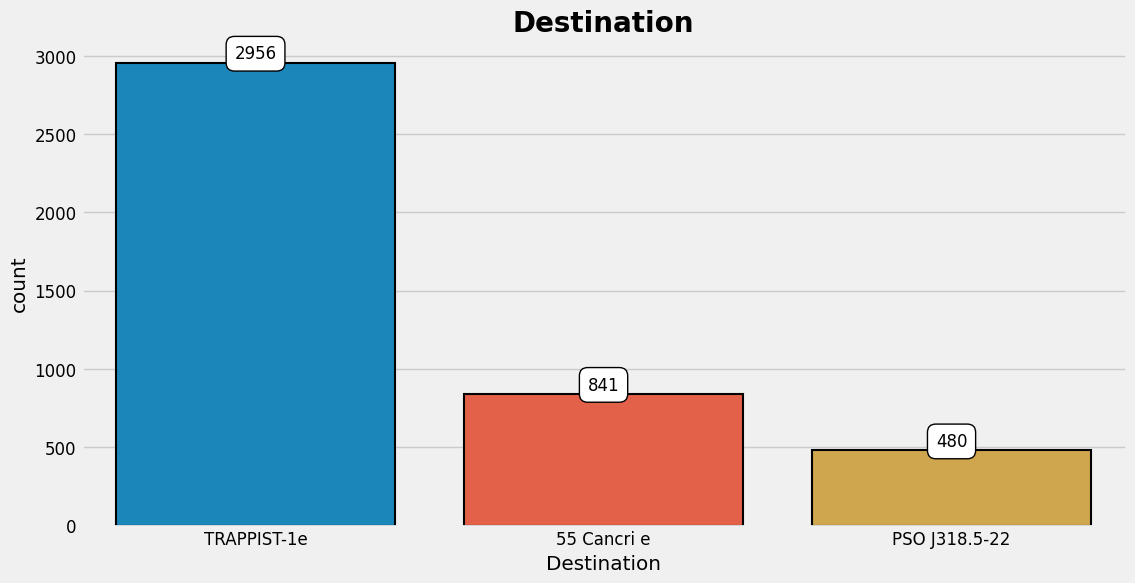

In [72]:
countplot_one_column('Destination', 'Destination')


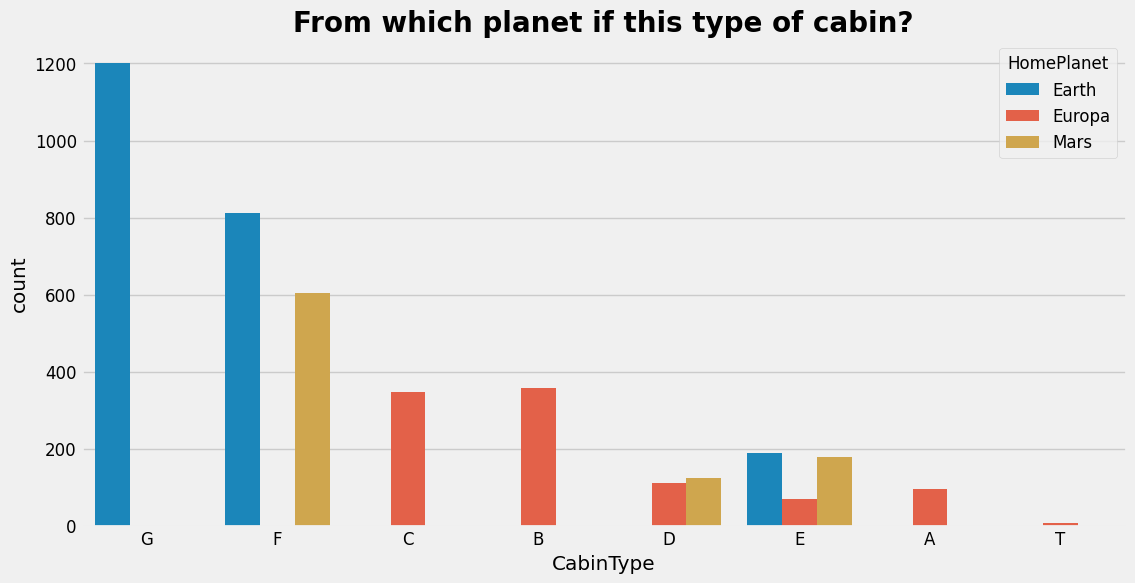

In [73]:
sns.countplot(data = df_test,
              x = 'CabinType',
              hue = 'HomePlanet')
plt.title('From which planet if this type of cabin?', fontweight = 'bold')
plt.show()


In [74]:
def fillnatest_column(columns_nan, column_fill, value, fill):
    df_test.loc[(df_test[columns_nan].isna()) & (df_test[column_fill] == value), columns_nan] = \
    df_test.loc[(df_test[columns_nan].isna()) & (df_test[column_fill] == value), columns_nan].fillna(fill)

In [75]:
fillnatest_column('HomePlanet', 'CabinType', 'B', 'Europa')
fillnatest_column('HomePlanet', 'CabinType', 'F', 'Earth')
fillnatest_column('HomePlanet', 'CabinType', 'A', 'Europa')
fillnatest_column('HomePlanet', 'CabinType', 'G', 'Earth')
fillnatest_column('HomePlanet', 'CabinType', 'E', 'Earth')
fillnatest_column('HomePlanet', 'CabinType', 'D', 'Mars')
fillnatest_column('HomePlanet', 'CabinType', 'C', 'Europa')
fillnatest_column('HomePlanet', 'CabinType', 'T', 'Europa')

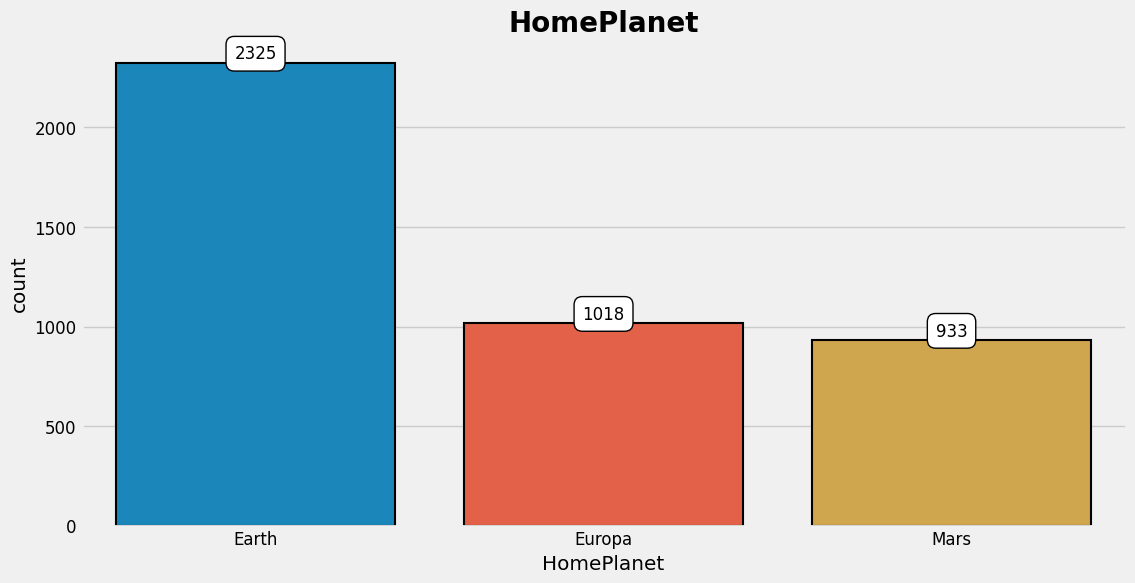

In [76]:
countplot_one_column('HomePlanet', 'HomePlanet')


In [77]:
df_test.loc[df_test['HomePlanet'].isna(), 'HomePlanet'] = df_test.loc[df_test['HomePlanet'].isna(), 'HomePlanet'].fillna("Earth")


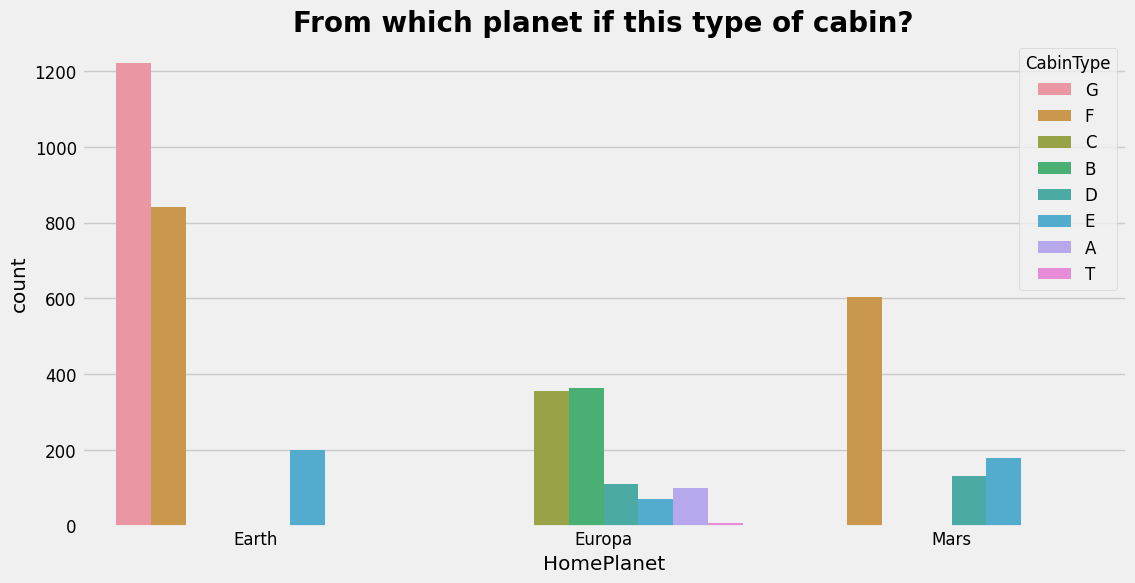

In [78]:
sns.countplot(data = df_test,
              x = 'HomePlanet',
              hue = 'CabinType')
plt.title('From which planet if this type of cabin?', fontweight = 'bold')
plt.show()

In [79]:
fillnatest_column('CabinType', 'HomePlanet', 'Europa', 'B')
fillnatest_column('CabinType', 'HomePlanet', 'Earth', 'G')
fillnatest_column('CabinType', 'HomePlanet', 'Mars', 'F')


In [80]:
df_test = df_test.drop('NumCabins' , axis = 1)

In [81]:
df_test.head()

,Group,NumberInGroup,CountGroup,HomePlanet,CryoSleep,CabinType,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,13,1,1,Earth,True,G,S,TRAPPIST-1e,27.0,False,0.0,0.00,0.00,0.00,0.0
1,18,1,1,Earth,False,F,S,TRAPPIST-1e,19.0,False,0.0,9.00,0.00,3948.61,0.0
2,19,1,1,Europa,True,C,S,55 Cancri e,31.0,False,0.0,110.05,0.00,85.51,0.0
3,21,1,1,Europa,False,C,S,TRAPPIST-1e,38.0,False,0.0,5666.00,62.19,85.51,585.0
4,23,1,1,Earth,False,F,S,TRAPPIST-1e,20.0,False,10.0,0.00,635.00,85.51,0.0


In [82]:
df_test.isna().sum()

Group            0
NumberInGroup    0
CountGroup       0
HomePlanet       0
CryoSleep        0
CabinType        0
Side             0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [83]:
df_test.shape

(4277, 15)

In [84]:
df_test.head()

,Group,NumberInGroup,CountGroup,HomePlanet,CryoSleep,CabinType,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,13,1,1,Earth,True,G,S,TRAPPIST-1e,27.0,False,0.0,0.00,0.00,0.00,0.0
1,18,1,1,Earth,False,F,S,TRAPPIST-1e,19.0,False,0.0,9.00,0.00,3948.61,0.0
2,19,1,1,Europa,True,C,S,55 Cancri e,31.0,False,0.0,110.05,0.00,85.51,0.0
3,21,1,1,Europa,False,C,S,TRAPPIST-1e,38.0,False,0.0,5666.00,62.19,85.51,585.0
4,23,1,1,Earth,False,F,S,TRAPPIST-1e,20.0,False,10.0,0.00,635.00,85.51,0.0


In [85]:
#Transforma la variable booleana en numèrica ( 0 y 1)
label_encoder_test = LabelEncoder()

df_test['CryoSleep'] = label_encoder_test.fit_transform(df_test['CryoSleep'])
df_test['VIP'] = label_encoder_test.fit_transform(df_test['VIP'])


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd

numeric_test = ['Group', 'NumberInGroup', 'CountGroup', 'Age', 'RoomService', 
        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

cat_test = ['HomePlanet', 'CabinType', 'Side', 'Destination']

others_col_test = ['CryoSleep', 'VIP']

trans_cat_test = ('CatTransTest', OneHotEncoder(), cat_test)
trans_num_test = ('NumTransTest', MinMaxScaler(), numeric_test)

transformer_test = ColumnTransformer([trans_cat_test, trans_num_test], remainder='passthrough')

transformed_data_test = transformer_test.fit_transform(df_test)

# Obtiene los nombres de las columnas categóricas codificadas
cat_encoder_test = transformer_test.named_transformers_['CatTransTest']
cat_encoded_names_test = cat_encoder.get_feature_names_out(cat_test)

# Combina los nombres de las columnas categóricas codificadas con las columnas numéricas y restantes
column_names_test = list(cat_encoded_names_test) + numeric_test + others_col_test

df_transformed_test = pd.DataFrame(transformed_data_test, columns=column_names_test)

df_transformed_test.shape


(4277, 27)

In [87]:
df_transformed_test.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CabinType_A,CabinType_B,CabinType_C,CabinType_D,CabinType_E,CabinType_F,CabinType_G,...,NumberInGroup,CountGroup,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.240506,0.000000,0.001588,0.000000,1.000000,0.000000,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.392405,0.000000,0.019423,0.000000,0.021656,0.000000,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.481013,0.000000,1.000000,0.031110,0.021656,0.135942,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.253165,0.000865,0.000000,0.317657,0.021656,0.000000,0.0,0.0


In [88]:
print(df_test.HomePlanet.value_counts(normalize = True))


HomePlanet
Earth     0.543839
Europa    0.238017
Mars      0.218144
Name: proportion, dtype: float64


### CatBoost prediction

In [89]:
y_pred = model.predict(df_transformed_test)
y_pred

array([0., 0., 1., ..., 1., 1., 1.])

In [90]:
CatBoost_sub = {
        'PassengerId': PassengerId,
        'Transported': y_pred
       }

CatBoost_sub = pd.DataFrame(CatBoost_sub)


In [91]:
CatBoost_sub['Transported'] = CatBoost_sub['Transported'].replace({1: True, 0: False})
CatBoost_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [92]:
CatBoost_sub.to_csv('submission.csv', index = False)


In [93]:
sub = pd.read_csv("submission.csv")

In [94]:
sub.shape

(4277, 2)

### RandomForest

In [95]:
X_train, X_val, y_train, y_val = train_test_split(df_transformed.drop(['Transported'], axis=1), df_transformed['Transported'], train_size=0.9)
X_test = df_transformed_test
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=1800)

In [96]:
rfc_pred = rfc.predict(X_test)



In [97]:
# Crear un DataFrame con las predicciones
rfc_sub = {
    'Group': df_test['Group'],  # Usar la columna 'Group' en lugar de 'PassengerId'
    'NumberInGroup': df_test['NumberInGroup'],  # Usar la columna 'NumberInGroup'
    'Transported': y_pred
}

rfc_sub = pd.DataFrame(rfc_sub)

# Reemplazar los valores 1 y 0 con True y False respectivamente
rfc_sub['Transported'] = rfc_sub['Transported'].replace({1: True, 0: False})

# Rellenar con ceros a la izquierda para que 'Group' tenga 4 caracteres
rfc_sub['Group'] = rfc_sub['Group'].astype(str).str.zfill(4)

# Rellenar con ceros a la izquierda para que 'NumberInGroup' tenga 2 caracteres
rfc_sub['NumberInGroup'] = rfc_sub['NumberInGroup'].astype(str).str.zfill(2)

# Crear la columna 'PassengerId' combinando 'Group' y 'NumberInGroup'
rfc_sub['PassengerId'] = rfc_sub['Group'].astype(str) + '_' + rfc_sub['NumberInGroup'].astype(str)

# Obtener el índice de la columna "PassengerId"
passenger_id_index = rfc_sub.columns.get_loc('PassengerId')

# Reorganizar las columnas del DataFrame para poner "PassengerId" al principio
rfc_sub = rfc_sub[[rfc_sub.columns[passenger_id_index]] + [col for col in rfc_sub.columns if col != 'PassengerId']]

#Eliminar las columnas Group e NumberInGroup

rfc_sub = rfc_sub.drop(["Group", "NumberInGroup"], axis=1)

# Mostrar las primeras filas del DataFrame
rfc_sub.head()

rfc_sub ['Transported'] = rfc_sub['Transported'].replace({1: True, 0: False})
rfc_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [98]:
rfc_pred = rfc.predict(df_transformed_test)
rfc_pred

array([1., 0., 1., ..., 1., 1., 1.])

In [99]:
rfc_sub.to_csv('submission_random.csv', index = False)

### LogisticRegression

In [100]:
X_train, X_val, y_train, y_val = train_test_split(df_transformed.drop(['Transported'], axis=1), df_transformed['Transported'], train_size=0.9)



In [101]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [102]:
y_pred = model.predict(X_test)

In [103]:
# Crear un DataFrame con las predicciones del mejor modelo

lr_sub = {
    'Group': df_test['Group'],  # Usar la columna 'Group' en lugar de 'PassengerId'
    'NumberInGroup': df_test['NumberInGroup'],  # Usar la columna 'NumberInGroup'
    'Transported': y_pred
}

lr_sub = pd.DataFrame(lr_sub)
lr_sub['Transported'] = lr_sub['Transported'].replace({1: True, 0: False})


# Rellenar con ceros a la izquierda para que 'Group' tenga 4 caracteres
lr_sub['Group'] = lr_sub['Group'].astype(str).str.zfill(4)

# Rellenar con ceros a la izquierda para que 'NumberInGroup' tenga 2 caracteres
lr_sub['NumberInGroup'] = lr_sub['NumberInGroup'].astype(str).str.zfill(2)

# Crear la columna 'PassengerId' combinando 'Group' y 'NumberInGroup'
lr_sub['PassengerId'] = lr_sub['Group'].astype(str) + '_' + lr_sub['NumberInGroup'].astype(str)

# Obtener el índice de la columna "PassengerId"
passenger_id_index = lr_sub.columns.get_loc('PassengerId')

# Reorganizar las columnas del DataFrame para poner "PassengerId" al principio
lr_sub = lr_sub[[lr_sub.columns[passenger_id_index]] + [col for col in lr_sub.columns if col != 'PassengerId']]

#Eliminar las columnas Group e NumberInGroup

lr_sub = lr_sub.drop(["Group", "NumberInGroup"], axis=1)
# Mostrar las primeras filas del DataFrame con las predicciones del mejor modelo
lr_sub.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [104]:
lr_sub.to_csv('submission_lr.csv', index = False)

In [105]:
#model = LogisticRegression(C=0.1, max_iter=100)
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

## CatBoost

In [106]:
# Crear y entrenar el modelo CatBoost
catboost_model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1)
catboost_model.fit(X_train, y_train)
X_test = df_transformed_test


# Realizar predicciones en el conjunto de prueba
y_pred = catboost_model.predict(X_test)


# Crear un DataFrame con las predicciones
CatBoost_sub = {
    'Group': df_test['Group'],  # Usar la columna 'Group' en lugar de 'PassengerId'
    'NumberInGroup': df_test['NumberInGroup'],  # Usar la columna 'NumberInGroup'
    'Transported': y_pred
}

CatBoost_sub = pd.DataFrame(CatBoost_sub)

# Reemplazar los valores 1 y 0 con True y False respectivamente
CatBoost_sub['Transported'] = CatBoost_sub['Transported'].replace({1: True, 0: False})

# Rellenar con ceros a la izquierda para que 'Group' tenga 4 caracteres
CatBoost_sub['Group'] = CatBoost_sub['Group'].astype(str).str.zfill(4)

# Rellenar con ceros a la izquierda para que 'NumberInGroup' tenga 2 caracteres
CatBoost_sub['NumberInGroup'] = CatBoost_sub['NumberInGroup'].astype(str).str.zfill(2)

# Crear la columna 'PassengerId' combinando 'Group' y 'NumberInGroup'
CatBoost_sub['PassengerId'] = CatBoost_sub['Group'].astype(str) + '_' + CatBoost_sub['NumberInGroup'].astype(str)

# Obtener el índice de la columna "PassengerId"
passenger_id_index = CatBoost_sub.columns.get_loc('PassengerId')

# Reorganizar las columnas del DataFrame para poner "PassengerId" al principio
CatBoost_sub = CatBoost_sub[[CatBoost_sub.columns[passenger_id_index]] + [col for col in CatBoost_sub.columns if col != 'PassengerId']]

#Eliminar las columnas Group e NumberInGroup

CatBoost_sub = CatBoost_sub.drop(["Group", "NumberInGroup"], axis=1)

# Mostrar las primeras filas del DataFrame
CatBoost_sub.head()


0:	learn: 0.6518052	total: 3.58ms	remaining: 354ms
1:	learn: 0.6204180	total: 7.75ms	remaining: 380ms
2:	learn: 0.5942176	total: 11.6ms	remaining: 375ms
3:	learn: 0.5683056	total: 14.8ms	remaining: 355ms
4:	learn: 0.5534757	total: 18.3ms	remaining: 348ms
5:	learn: 0.5378368	total: 21.9ms	remaining: 343ms
6:	learn: 0.5208457	total: 25.5ms	remaining: 339ms
7:	learn: 0.5080148	total: 28.9ms	remaining: 332ms
8:	learn: 0.5006679	total: 32.6ms	remaining: 329ms
9:	learn: 0.4935059	total: 36.1ms	remaining: 325ms
10:	learn: 0.4878080	total: 39.9ms	remaining: 323ms
11:	learn: 0.4830418	total: 43.5ms	remaining: 319ms
12:	learn: 0.4782482	total: 47.1ms	remaining: 315ms
13:	learn: 0.4746440	total: 50.5ms	remaining: 310ms
14:	learn: 0.4700548	total: 54.6ms	remaining: 309ms
15:	learn: 0.4669710	total: 58.2ms	remaining: 306ms
16:	learn: 0.4632660	total: 61.9ms	remaining: 302ms
17:	learn: 0.4595393	total: 65.6ms	remaining: 299ms
18:	learn: 0.4550278	total: 69.5ms	remaining: 296ms
19:	learn: 0.4517358	t

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [107]:
CatBoost_sub.to_csv('submission_catboost.csv', index = False)

## Tuning CatBoost

### primeiro ajuste de parametros

In [108]:
# Definir los parámetros que deseas ajustar
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [5, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001]
}

best_accuracy = 0
best_params = {}

# Realizar búsqueda de cuadrícula para encontrar los mejores parámetros
for iterations in param_grid['iterations']:
    for depth in param_grid['depth']:
        for learning_rate in param_grid['learning_rate']:
            catboost_model = CatBoostClassifier(iterations=iterations, depth=depth, learning_rate=learning_rate)
            catboost_model.fit(X_train, y_train)
            y_pred = catboost_model.predict(X_test)
            #accuracy = accuracy_score(y_pred_best, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    'iterations': iterations,
                    'depth': depth,
                    'learning_rate': learning_rate
                }

print("Mejores parámetros:", best_params)
print("Mejor precisión:", best_accuracy)
print("Mejores parámetros:", best_params)
print("Mejor precisión:", best_accuracy)

# Crear y entrenar el modelo con los mejores parámetros
best_catboost_model = CatBoostClassifier(
    iterations=best_params['iterations'],
    depth=best_params['depth'],
    learning_rate=best_params['learning_rate']
)
best_catboost_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred_best = best_catboost_model.predict(X_test)

# Crear un DataFrame con las predicciones del mejor modelo

CatBoost_sub_best = {
    'Group': df_test['Group'],  # Usar la columna 'Group' en lugar de 'PassengerId'
    'NumberInGroup': df_test['NumberInGroup'],  # Usar la columna 'NumberInGroup'
    'Transported': y_pred_best
}

CatBoost_sub_best = pd.DataFrame(CatBoost_sub_best)
CatBoost_sub_best['Transported'] = CatBoost_sub_best['Transported'].replace({1: True, 0: False})


# Rellenar con ceros a la izquierda para que 'Group' tenga 4 caracteres
CatBoost_sub_best['Group'] = CatBoost_sub_best['Group'].astype(str).str.zfill(4)

# Rellenar con ceros a la izquierda para que 'NumberInGroup' tenga 2 caracteres
CatBoost_sub_best['NumberInGroup'] = CatBoost_sub_best['NumberInGroup'].astype(str).str.zfill(2)

# Crear la columna 'PassengerId' combinando 'Group' y 'NumberInGroup'
CatBoost_sub_best['PassengerId'] = CatBoost_sub_best['Group'].astype(str) + '_' + CatBoost_sub_best['NumberInGroup'].astype(str)

# Obtener el índice de la columna "PassengerId"
passenger_id_index = CatBoost_sub_best.columns.get_loc('PassengerId')

# Reorganizar las columnas del DataFrame para poner "PassengerId" al principio
CatBoost_sub_best = CatBoost_sub_best[[CatBoost_sub_best.columns[passenger_id_index]] + [col for col in CatBoost_sub_best.columns if col != 'PassengerId']]

#Eliminar las columnas Group e NumberInGroup

CatBoost_sub_best = CatBoost_sub_best.drop(["Group", "NumberInGroup"], axis=1)
# Mostrar las primeras filas del DataFrame con las predicciones del mejor modelo
CatBoost_sub_best.head()


0:	learn: 0.6518052	total: 4.26ms	remaining: 422ms
1:	learn: 0.6204180	total: 7.55ms	remaining: 370ms
2:	learn: 0.5942176	total: 10.9ms	remaining: 352ms
3:	learn: 0.5683056	total: 14.4ms	remaining: 345ms
4:	learn: 0.5534757	total: 18.2ms	remaining: 346ms
5:	learn: 0.5378368	total: 21.6ms	remaining: 339ms
6:	learn: 0.5208457	total: 25.3ms	remaining: 336ms
7:	learn: 0.5080148	total: 29.3ms	remaining: 337ms
8:	learn: 0.5006679	total: 33.2ms	remaining: 336ms
9:	learn: 0.4935059	total: 36.8ms	remaining: 331ms
10:	learn: 0.4878080	total: 40.5ms	remaining: 327ms
11:	learn: 0.4830418	total: 44.1ms	remaining: 324ms
12:	learn: 0.4782482	total: 48.2ms	remaining: 323ms
13:	learn: 0.4746440	total: 52.5ms	remaining: 323ms
14:	learn: 0.4700548	total: 56.3ms	remaining: 319ms
15:	learn: 0.4669710	total: 60.1ms	remaining: 316ms
16:	learn: 0.4632660	total: 64.1ms	remaining: 313ms
17:	learn: 0.4595393	total: 67.9ms	remaining: 309ms
18:	learn: 0.4550278	total: 71.4ms	remaining: 305ms
19:	learn: 0.4517358	t

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [109]:
CatBoost_sub.to_csv('submission_catboost.csv', index = False)

### Aplicación Gradient CatBoost 1

In [110]:
# Crear y entrenar el modelo Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba con el modelo Gradient Boosting
y_pred_gb = gradient_boosting_model.predict(X_test)

# Crear un DataFrame con las predicciones del modelo Gradient Boosting
GB_sub = {
    'Group': df_test['Group'],  # Usar la columna 'Group' en lugar de 'PassengerId'
    'NumberInGroup': df_test['NumberInGroup'],  # Usar la columna 'NumberInGroup'
    'Transported': y_pred_gb
}

GB_sub = pd.DataFrame(GB_sub)
GB_sub['Transported'] = GB_sub['Transported'].replace({1: True, 0: False})


# Rellenar con ceros a la izquierda para que 'Group' tenga 4 caracteres
GB_sub['Group'] = GB_sub['Group'].astype(str).str.zfill(4)

# Rellenar con ceros a la izquierda para que 'NumberInGroup' tenga 2 caracteres
GB_sub['NumberInGroup'] = GB_sub['NumberInGroup'].astype(str).str.zfill(2)

# Crear la columna 'PassengerId' combinando 'Group' y 'NumberInGroup'
GB_sub['PassengerId'] = GB_sub['Group'].astype(str) + '_' + GB_sub['NumberInGroup'].astype(str)

# Obtener el índice de la columna "PassengerId"
passenger_id_index = GB_sub.columns.get_loc('PassengerId')

# Reorganizar las columnas del DataFrame para poner "PassengerId" al principio
GB_sub = GB_sub[[GB_sub.columns[passenger_id_index]] + [col for col in GB_sub.columns if col != 'PassengerId']]

#Eliminar las columnas Group e NumberInGroup

GB_sub = GB_sub.drop(["Group", "NumberInGroup"], axis=1)

# Mostrar las primeras filas del DataFrame con las predicciones del modelo Gradient Boosting
GB_sub.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [111]:
GB_sub.to_csv('submission_catboost_ajustes.csv', index = False)

### segundo ajuste de parametros

In [ ]:
# Definir los parámetros que deseas ajustar
param_grid = {'iterations': [300, 400, 500],
                  'learning_rate': [0.01, 0.05, 0.1], 
                  'depth': [6, 8, 10, 12],
                  'l2_leaf_reg': [1, 3, 5, 7],
                  'border_count': [32, 64, 128],
                  'bagging_temperature': [0.6, 0.8, 1.0],
                  'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
                  'auto_class_weights': ['None', 'Balanced']}
best_accuracy = 0
best_params = {}

# Realizar búsqueda de cuadrícula para encontrar los mejores parámetros
for iterations in param_grid['iterations']:
    for learning_rate in param_grid['learning_rate']:
        for depth in param_grid['depth']:
            for l2_leaf_reg in param_grid['l2_leaf_reg']:
                for border_count in param_grid['border_count']:
                    for bagging_temperature in param_grid['bagging_temperature']:
                        for grow_policy in param_grid['grow_policy']:
                            for auto_class_weights in param_grid['auto_class_weights']:
                                catboost_model = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate, depth=depth, l2_leaf_reg=l2_leaf_reg, border_count=border_count, bagging_temperature=bagging_temperature, auto_class_weights=auto_class_weights)
                                catboost_model.fit(X_train, y_train)
                                y_pred = catboost_model.predict(X_test)
                                if accuracy > best_accuracy:
                                    best_accuracy = accuracy
                                    best_params = {
                                    'iterations': iterations,
                                    'learning_rate': learning_rate,
                                    'depth': depth,
                                    'learning_rate': learning_rate,
                                    'l2_leaf_reg': l2_leaf_reg,
                                    'border_count': border_count,
                                    'bagging_temperature': bagging_temperature,
                                    'auto_class_weights': auto_class_weights}

print("Mejores parámetros:", best_params)
print("Mejor precisión:", best_accuracy)
print("Mejores parámetros:", best_params)
print("Mejor precisión:", best_accuracy)

0:	learn: 0.6886441	total: 4.09ms	remaining: 1.22s
1:	learn: 0.6840070	total: 8.25ms	remaining: 1.23s
2:	learn: 0.6795224	total: 11.9ms	remaining: 1.18s
3:	learn: 0.6746814	total: 15.6ms	remaining: 1.16s
4:	learn: 0.6702369	total: 19.3ms	remaining: 1.14s
5:	learn: 0.6659647	total: 23.6ms	remaining: 1.16s
6:	learn: 0.6623820	total: 27.6ms	remaining: 1.16s
7:	learn: 0.6584639	total: 31.4ms	remaining: 1.15s
8:	learn: 0.6540666	total: 35.4ms	remaining: 1.15s
9:	learn: 0.6499131	total: 39.6ms	remaining: 1.15s
10:	learn: 0.6457392	total: 43.6ms	remaining: 1.14s
11:	learn: 0.6418318	total: 47.4ms	remaining: 1.14s
12:	learn: 0.6387830	total: 51.4ms	remaining: 1.13s
13:	learn: 0.6361291	total: 55.2ms	remaining: 1.13s
14:	learn: 0.6318875	total: 59.1ms	remaining: 1.12s
15:	learn: 0.6278729	total: 62.8ms	remaining: 1.11s
16:	learn: 0.6243001	total: 67.2ms	remaining: 1.12s
17:	learn: 0.6205319	total: 71.5ms	remaining: 1.12s
18:	learn: 0.6180924	total: 76ms	remaining: 1.12s
19:	learn: 0.6147122	tot